### House Prices
(Simple Linear Regression)

**Name:** Adiel Delgado Silva

### Import Libraries

In [1]:
# Data Manipulation

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Sample split
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Import the DataSet

In [2]:
df = pd.read_csv("house_prices.csv")

### Data Inspection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

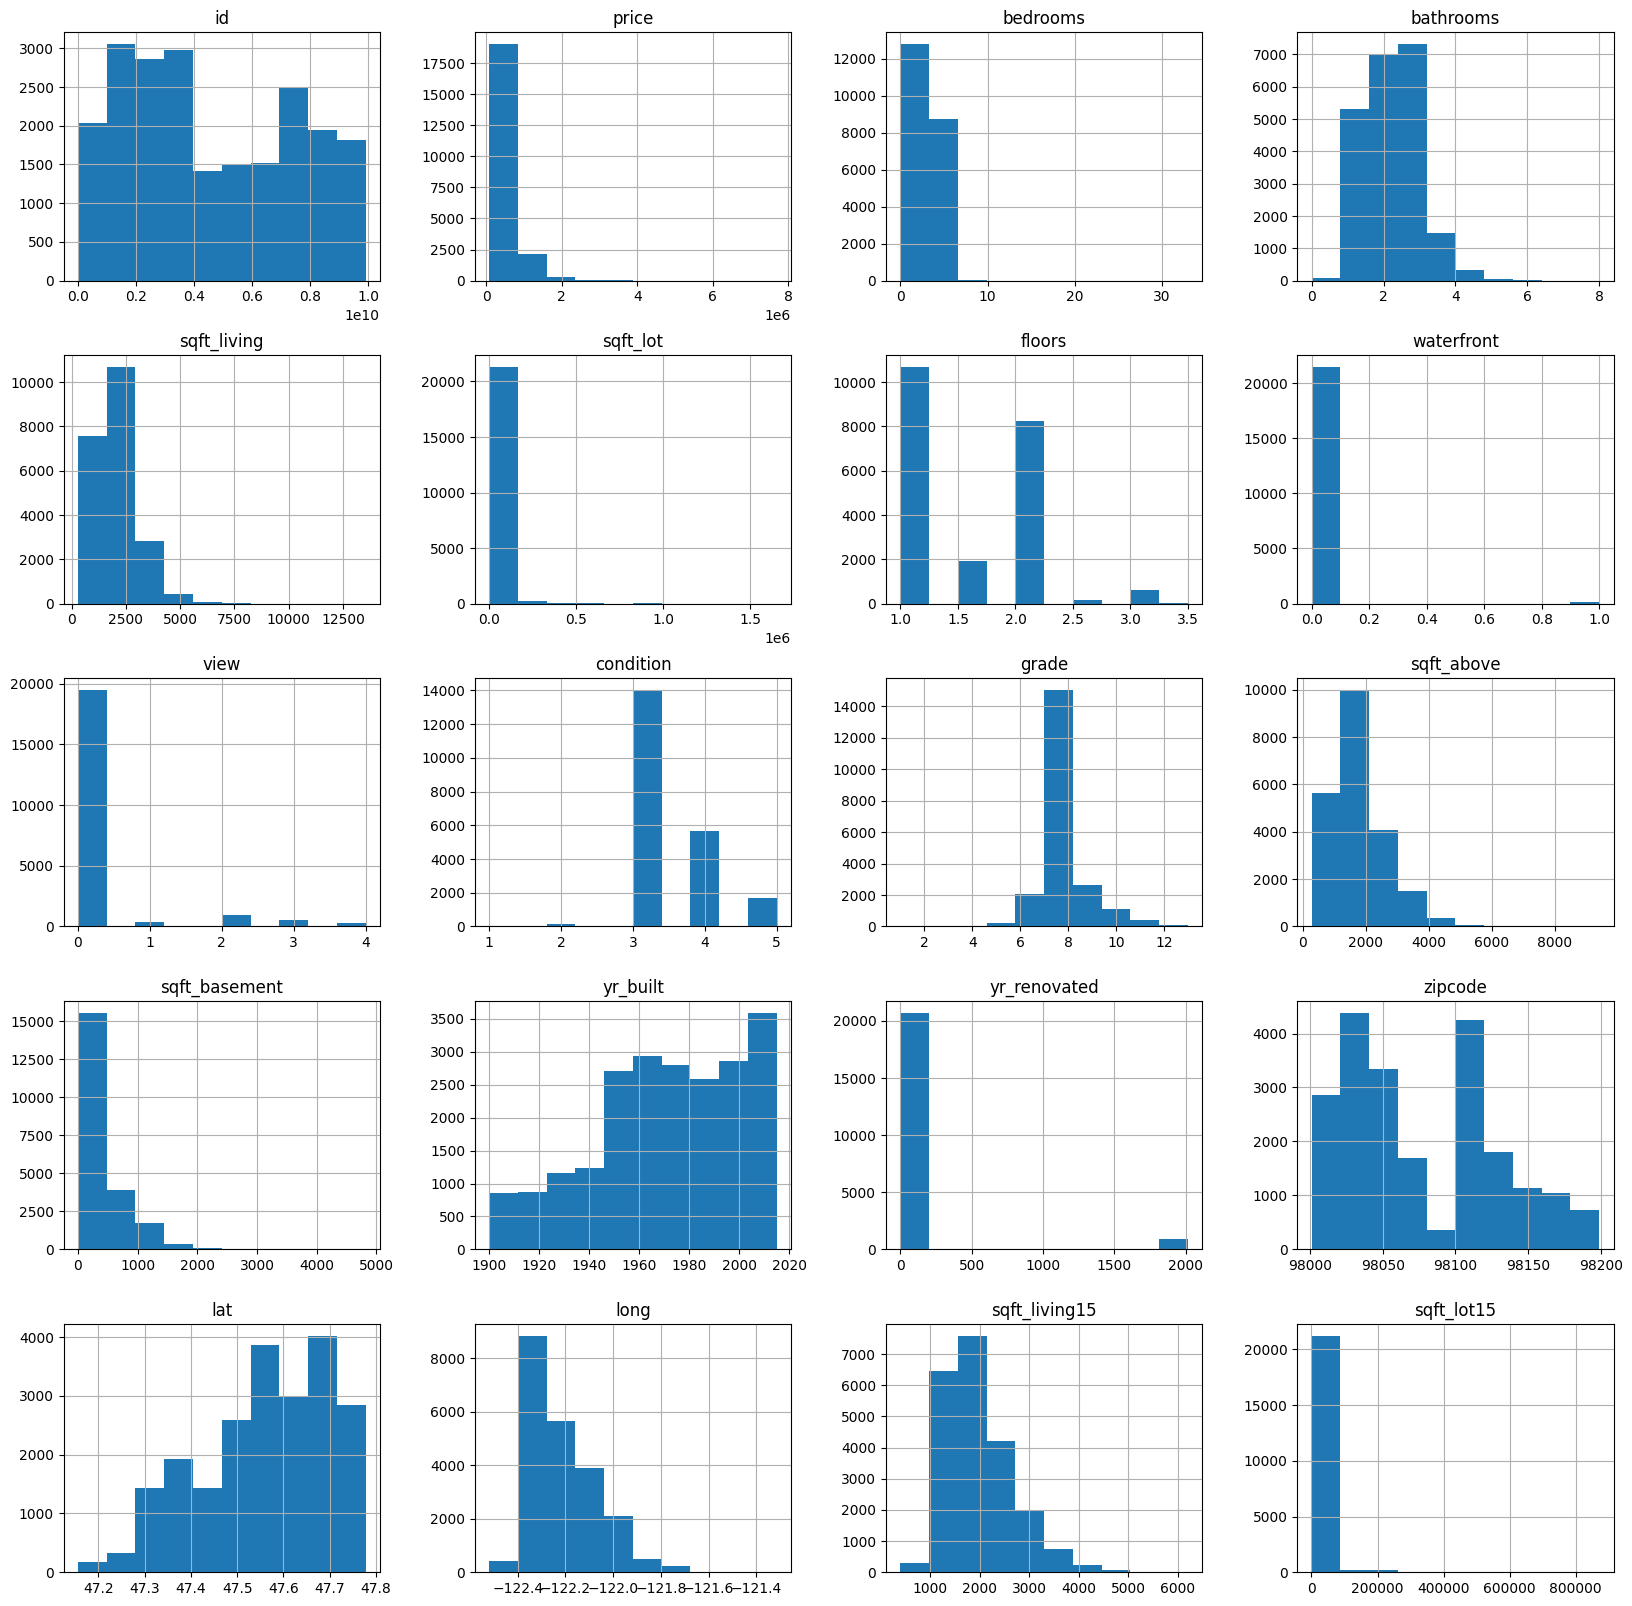

In [6]:
df.hist(figsize=(20,20))

### What is the most expensive house?

In [7]:
df.loc[df["price"].idxmax()]

id                    6762700020
date             20141013T000000
price                  7700000.0
bedrooms                       6
bathrooms                    8.0
sqft_living                12050
sqft_lot                   27600
floors                       2.5
waterfront                     0
view                           3
condition                      4
grade                         13
sqft_above                  8570
sqft_basement               3480
yr_built                    1910
yr_renovated                1987
zipcode                    98102
lat                      47.6298
long                    -122.323
sqft_living15               3940
sqft_lot15                  8800
Name: 7252, dtype: object

### What is the cheapest house?

In [8]:
df.loc[df["price"].idxmin()]

id                    3421079032
date             20150217T000000
price                    75000.0
bedrooms                       1
bathrooms                    0.0
sqft_living                  670
sqft_lot                   43377
floors                       1.0
waterfront                     0
view                           0
condition                      3
grade                          3
sqft_above                   670
sqft_basement                  0
yr_built                    1966
yr_renovated                   0
zipcode                    98022
lat                      47.2638
long                    -121.906
sqft_living15               1160
sqft_lot15                 42882
Name: 1149, dtype: object

### What is the house with the most rooms?

In [9]:
df.loc[df["bedrooms"].idxmax()]

id                    2402100895
date             20140625T000000
price                   640000.0
bedrooms                      33
bathrooms                   1.75
sqft_living                 1620
sqft_lot                    6000
floors                       1.0
waterfront                     0
view                           0
condition                      5
grade                          7
sqft_above                  1040
sqft_basement                580
yr_built                    1947
yr_renovated                   0
zipcode                    98103
lat                      47.6878
long                    -122.331
sqft_living15               1330
sqft_lot15                  4700
Name: 15870, dtype: object

### What is the house with the fewest rooms?

In [10]:
df.loc[df["bedrooms"].idxmin()]

id                    6306400140
date             20140612T000000
price                  1095000.0
bedrooms                       0
bathrooms                    0.0
sqft_living                 3064
sqft_lot                    4764
floors                       3.5
waterfront                     0
view                           2
condition                      3
grade                          7
sqft_above                  3064
sqft_basement                  0
yr_built                    1990
yr_renovated                   0
zipcode                    98102
lat                      47.6362
long                    -122.322
sqft_living15               2360
sqft_lot15                  4000
Name: 875, dtype: object

### Price of 10 houses with the best condition

In [11]:
filtered_df = df[['price', 'condition']].sort_values(by='condition', ascending=False).head(10)
filtered_df.sort_values(by='condition', ascending=False).head(10)

,price,condition
16345,670000.0,5
17169,745000.0,5
14520,378000.0,5
919,290000.0,5
2762,555000.0,5
21303,465000.0,5
2763,579000.0,5
16327,1030000.0,5
15636,235000.0,5
17177,1185000.0,5


In [35]:
filtered_df = pd.DataFrame({
   'price': [670000.0, 745000.0, 378000.0, 290000.0, 555000.0, 465000.0, 579000.0, 1030000.0, 235000.0, 1185000.0],
   'condition': [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
}, index=[16345, 17169, 14520, 919, 2762, 21303, 2763, 16327, 15636, 17177])

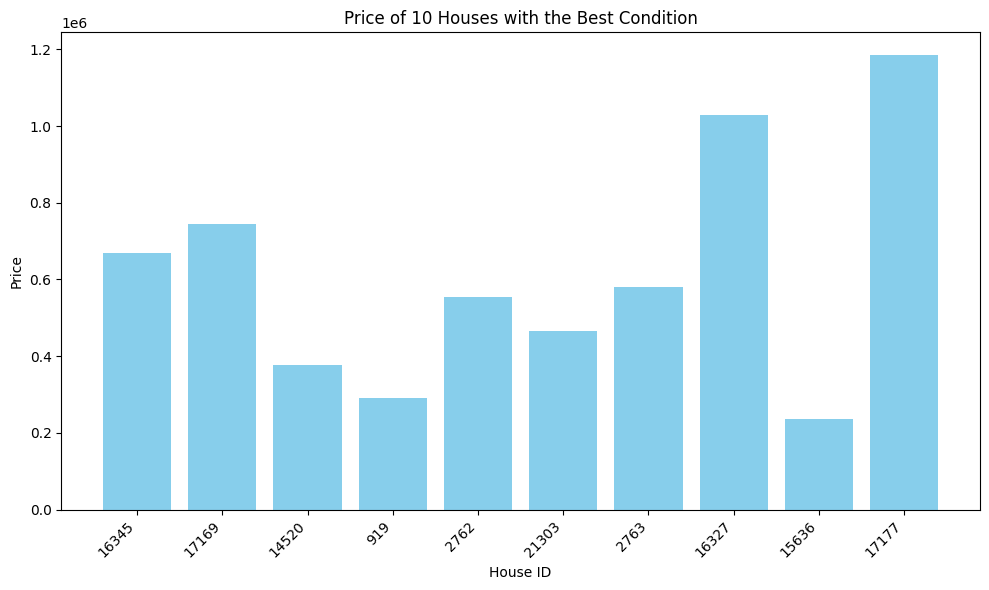

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(filtered_df.index.astype(str), filtered_df['price'], color='skyblue')
plt.xlabel('House ID')
plt.ylabel('Price')
plt.title('Price of 10 Houses with the Best Condition')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### Houses Building per year

In [22]:
houses_per_year = df.groupby('yr_built')['id'].count()
houses_per_year

yr_built
1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: id, Length: 116, dtype: int64

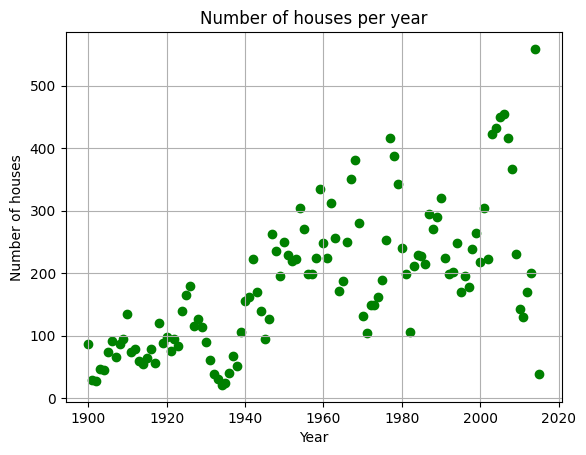

In [23]:
plt.scatter(houses_per_year.index, houses_per_year.values, marker='o', color='g')
plt.title("Number of houses per year")
plt.xlabel("Year")
plt.ylabel("Number of houses")
plt.grid(True)
plt.show()

### Houses with waterfront or without

In [14]:
waterfront = df.groupby("waterfront")["id"].count()
waterfront

waterfront
0    21450
1      163
Name: id, dtype: int64

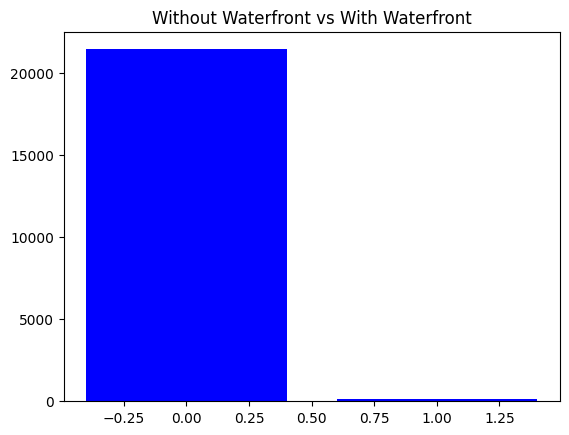

In [15]:
plt.bar(waterfront.index, waterfront.values, color="b")
plt.title("Without Waterfront vs With Waterfront")
plt.show()

### Distribution of Houses with waterfront or without it

C:\Users\nefth\AppData\Local\Temp\ipykernel_15736\1365804086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='waterfront', y='price', data=df, palette='coolwarm')


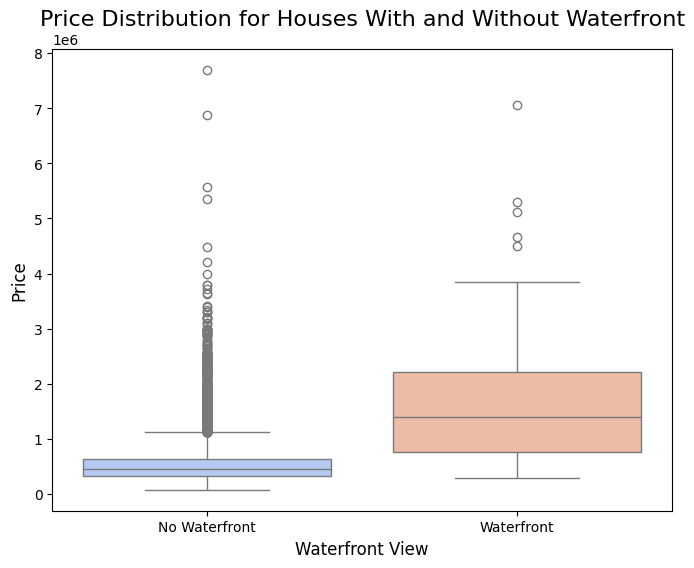

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='waterfront', y='price', data=df, palette='coolwarm')
plt.title('Price Distribution for Houses With and Without Waterfront', fontsize=16)
plt.xlabel('Waterfront View', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Waterfront', 'Waterfront'])
plt.show()

### Distribution of houses across number of floors

In [39]:
floor_counts = df['floors'].value_counts().sort_index()

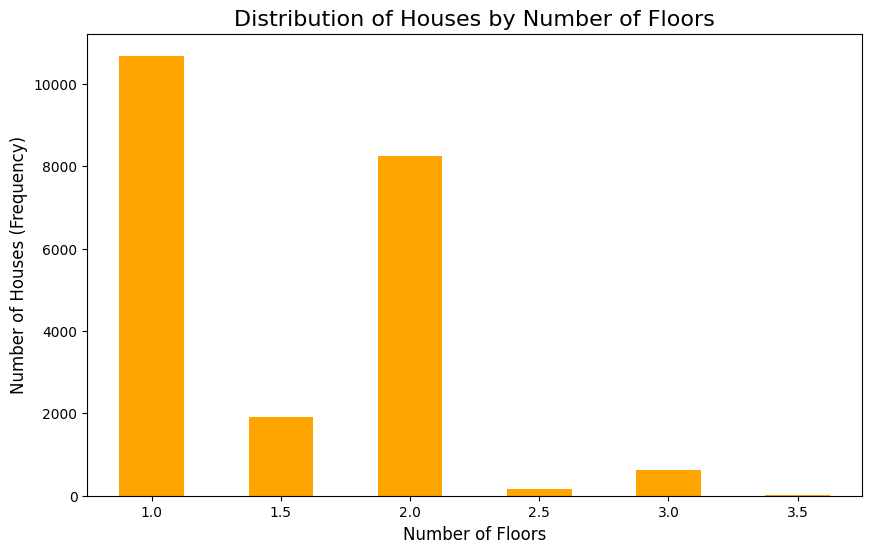

In [47]:
plt.figure(figsize=(10, 6))
floor_counts.plot(kind='bar', color='orange')
plt.title('Distribution of Houses by Number of Floors', fontsize=16)
plt.xlabel('Number of Floors', fontsize=12)
plt.ylabel('Number of Houses (Frequency)', fontsize=12)
plt.xticks(rotation=0)

# Display the plot
plt.show()

#### AVG Price based in year built

In [16]:

avg_price_by_year = df.groupby('yr_built')['price'].mean()
avg_price_by_year

yr_built
1900    581387.206897
1901    556935.931034
1902    673007.407407
1903    480958.195652
1904    583756.644444
            ...      
2011    544522.000000
2012    527447.335294
2013    678545.452736
2014    683681.754919
2015    759785.157895
Name: price, Length: 116, dtype: float64

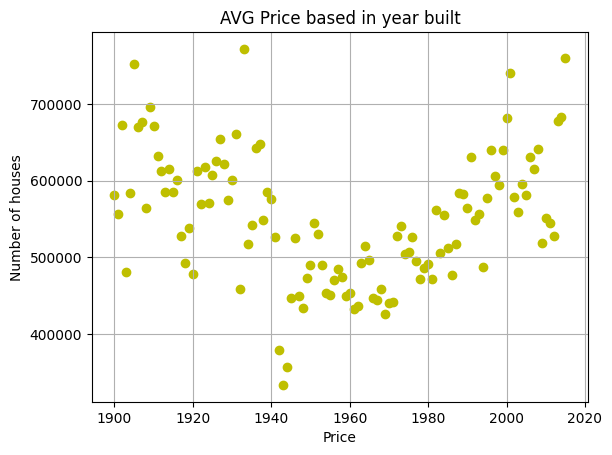

In [17]:
plt.scatter(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='y')
plt.title("AVG Price based in year built")
plt.xlabel("Price")
plt.ylabel("Number of houses")
plt.grid(True)
plt.show()

### Relationship between sqft living & sqft lot

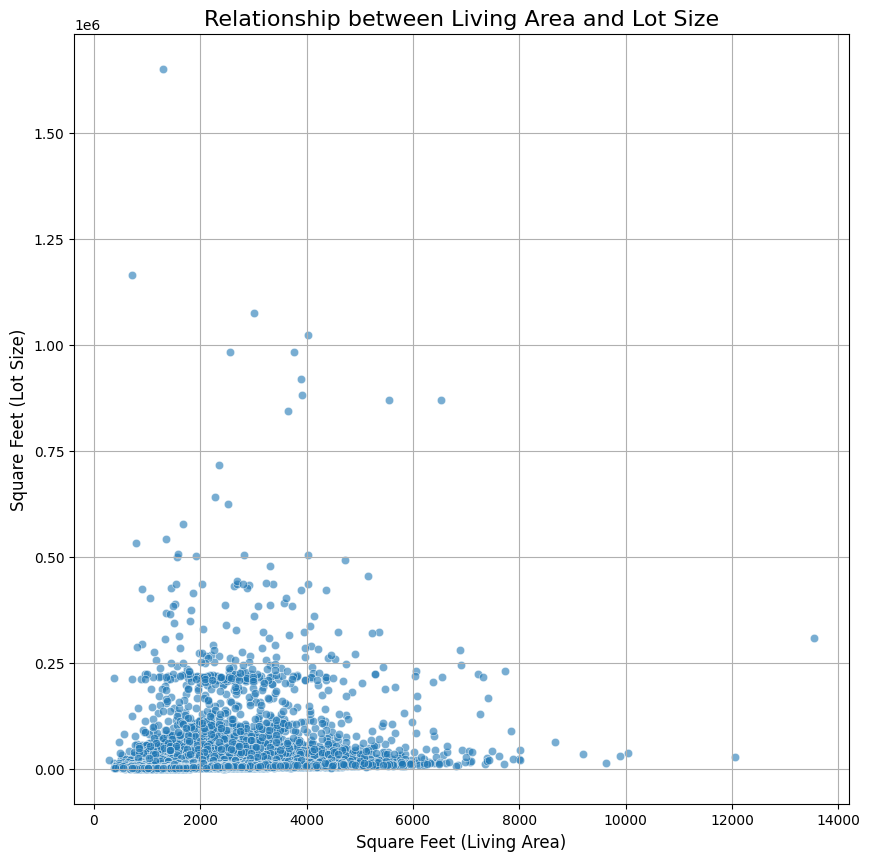

In [50]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='sqft_living', y='sqft_lot', data=df, alpha=0.6)
plt.title('Relationship between Living Area and Lot Size', fontsize=16)
plt.xlabel('Square Feet (Living Area)', fontsize=12)
plt.ylabel('Square Feet (Lot Size)', fontsize=12)
plt.grid(True)
plt.show()

### Conditions Frecuency

In [18]:
condition_counts = df.groupby("condition")["id"].count()
condition_counts

condition
1       30
2      172
3    14031
4     5679
5     1701
Name: id, dtype: int64

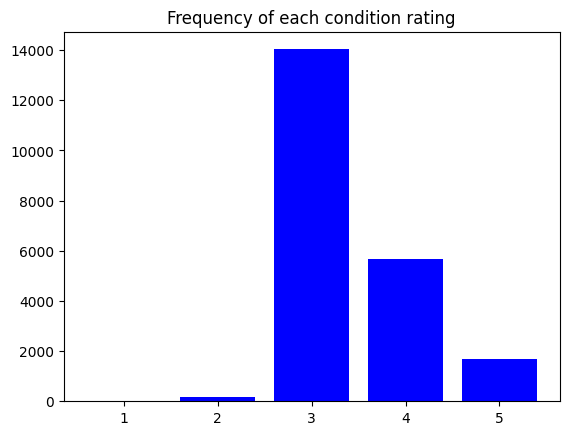

In [19]:
plt.bar(condition_counts.index, condition_counts.values, color="b")
plt.title("Frequency of each condition rating")
plt.show()

### Correlation between bedrooms and bathrooms

In [29]:
correlation_bed_bath = df[['bedrooms', 'bathrooms']].corr()

Text(0.5, 1.0, 'Correlation between bedrooms and bathrooms')

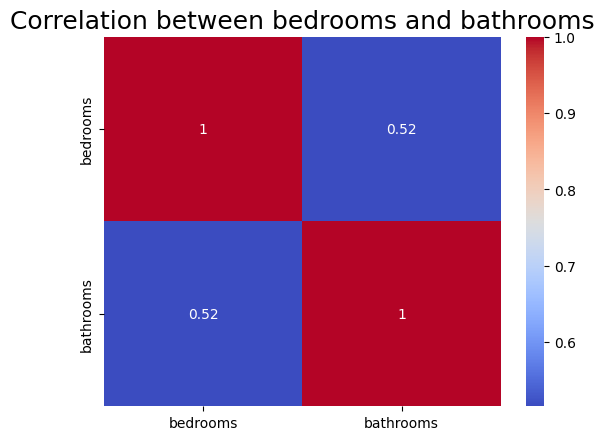

In [30]:
sns.heatmap(correlation_bed_bath, annot=True, cmap='coolwarm')
plt.title('Correlation between bedrooms and bathrooms', fontsize=18)

### Correlation between sqft above & sqft basement

In [31]:
correlation_abov_base = df[['sqft_above', 'sqft_basement']].corr()

Text(0.5, 1.0, 'Correlation between bedrooms and bathrooms')

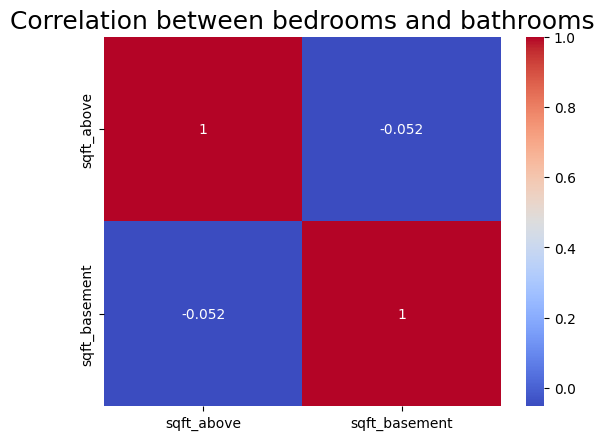

In [32]:
sns.heatmap(correlation_abov_base, annot=True, cmap='coolwarm')
plt.title('Correlation between bedrooms and bathrooms', fontsize=18)

## Lineal Regression Model

### Separating predictor and target

In [52]:
X = df[["sqft_living"]]
y = df[["price"]]

### Train-Test Split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [54]:
X_train.shape

(15129, 1)

In [55]:
y_train.shape

(15129, 1)

### Train the Model

In [56]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Evaluate the model with Training Data

In [57]:
y_pred = model.predict(X_train)
y_pred

array([[378251.77367302],
       [317170.94452654],
       [961296.05188946],
       ...,
       [414344.99089594],
       [322723.74717622],
       [522624.64256471]], shape=(15129, 1))

In [58]:
mse = mean_squared_error(y_train,y_pred)
r2 = r2_score(y_train, y_pred)
#Que tanto se diferencian los valores predecidos con el real
print("MSE: ", mse)
#Muestra el valor en porcentaje de accuracy
print("R2: ", r2)

MSE:  67561876335.47617
R2:  0.48929267468090987


### Evaluate the Model with Test Data

In [59]:
y_pred = model.predict(X_test)
y_pred

array([[480978.62269211],
       [192232.88490873],
       [661444.70880672],
       ...,
       [819699.58432261],
       [761395.15650096],
       [694761.5247048 ]], shape=(6484, 1))

In [60]:
#Ahora se usan los datos con los que se probó el modelo
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
#Que tanto se diferencian los valores predecidos con el real
print("MSE: ", mse)
#Muestra el valor en porcentaje de accuracy
print("R2: ", r2)

MSE:  70220542391.03374
R2:  0.500476845921541


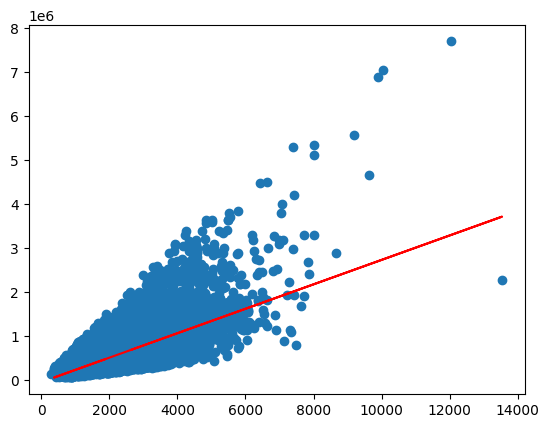

In [61]:
plt.scatter(X,y)
plt.plot(X_test, y_pred, color="red")